In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

In [2]:
#time step 만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [9]:
# sin 함수 학습 데이터 -1
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

In [10]:
#하이퍼 파라미터 -2
n_estimators= 15
n_features = 1

#n_timesteps = estimators 만큼 RNN 메모리 셀이 생성됨
#입력 벡터의 차원 크기는 n_featrues= 1로 정의함

In [11]:
#시퀀스 나누기 - 3
# train_x.shape -> (samples, timesteps)
# train_y.shape -> (samples)
train_x, train_y = split_sequence(train_y, step= n_estimators)
print('shape x {} y {}'.format(train_x.shape, train_y.shape)) 
#split_sequence함수를 이용해 메모리셀만큼 나눠서 입력 시퀀스를 생성함
#splt_sequence함수는 입력 인자로 넘어온 리스트 데이터를 순차적으로  step크기만큼 나눠
#RNN모델에 사용될 입력 시퀀스(x)와 출력(y)을 넘파이 배열로 만든다.

shape x (185, 15) y (185,)


In [12]:
#RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print('trainx shape {}'.format(train_x.shape))
print('trainy shape {}'.format(train_y.shape))
#케라스에서 rnn 계층을 사용하려면 3차원 텐서 형태여야함 
#그래서 2차원->3차원으로 변경해줌

trainx shape (185, 15, 1)
trainy shape (185,)


In [13]:
#rnn 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape = (n_estimators, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#units은 RNN계층에 존재하는 전체 뉴런 수
# return_sequences는 RNN계산 과정에서 은닉 상탯값을 출력할지 결정함 
# False는 마지막 시점의 메모리 셀 결과만 출력
#true이면 모두 출력
#return_sequences는 one to many, many to many 구조 즉 출력이 여러개일 때 사용
#input_shape는 rnn 모델의 입력 데이터 형상을 정의함

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss',
                               patience =5,
                               mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 1s 3ms/step - loss: 0.5059
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.3875
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 11/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 12/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 13/1000
6/6 [==============================

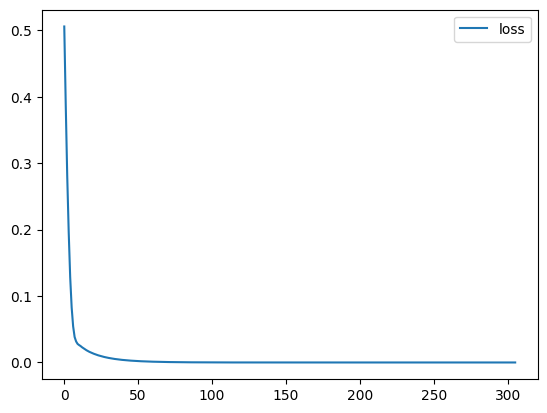

In [16]:
#loss 그래프 생성
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20 ,0.1)
calc_y = np.cos(test_x) #테스트 정답 데이터

In [18]:
#rnn 모델 예측 및 로그 저장
test_y = calc_y[:n_estimators]
for i in range(len(test_x) - n_estimators):
    net_input = test_y[i : i + n_estimators]
    net_input = net_input.reshape((1, n_estimators, n_features))
    train_y = model.predict(net_input, verbose=2)
    print(test_y.shape, train_y.shape, i, i+n_estimators)
    test_y=np.append(test_y, train_y)

1/1 - 0s - 150ms/epoch - 150ms/step
(15,) (1, 1) 0 15
1/1 - 0s - 18ms/epoch - 18ms/step
(16,) (1, 1) 1 16
1/1 - 0s - 18ms/epoch - 18ms/step
(17,) (1, 1) 2 17
1/1 - 0s - 18ms/epoch - 18ms/step
(18,) (1, 1) 3 18
1/1 - 0s - 17ms/epoch - 17ms/step
(19,) (1, 1) 4 19
1/1 - 0s - 17ms/epoch - 17ms/step
(20,) (1, 1) 5 20
1/1 - 0s - 17ms/epoch - 17ms/step
(21,) (1, 1) 6 21
1/1 - 0s - 18ms/epoch - 18ms/step
(22,) (1, 1) 7 22
1/1 - 0s - 17ms/epoch - 17ms/step
(23,) (1, 1) 8 23
1/1 - 0s - 17ms/epoch - 17ms/step
(24,) (1, 1) 9 24
1/1 - 0s - 16ms/epoch - 16ms/step
(25,) (1, 1) 10 25
1/1 - 0s - 17ms/epoch - 17ms/step
(26,) (1, 1) 11 26
1/1 - 0s - 18ms/epoch - 18ms/step
(27,) (1, 1) 12 27
1/1 - 0s - 18ms/epoch - 18ms/step
(28,) (1, 1) 13 28
1/1 - 0s - 18ms/epoch - 18ms/step
(29,) (1, 1) 14 29
1/1 - 0s - 17ms/epoch - 17ms/step
(30,) (1, 1) 15 30
1/1 - 0s - 18ms/epoch - 18ms/step
(31,) (1, 1) 16 31
1/1 - 0s - 17ms/epoch - 17ms/step
(32,) (1, 1) 17 32
1/1 - 0s - 17ms/epoch - 17ms/step
(33,) (1, 1) 18 33
1

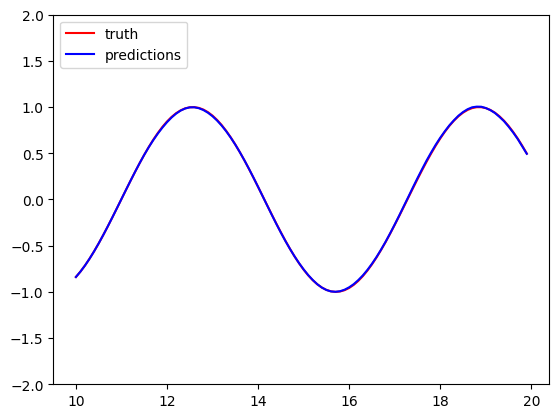

In [24]:
#예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label='truth', color='red')
plt.plot(test_x, test_y, label='predictions', color ='blue')

plt.legend(loc='upper left')
plt.ylim(-2,2)
plt.show()